In [7]:
%pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [9]:
%pip install gdown

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.0/143.0 kB 8.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [10]:
import gdown

gdown.download(url="https://drive.google.com/file/d/1aD954iBd7GcJLJdGI-9JhZqP0Rcl2OmB/view?usp=sharing", output="y_train.npy", quiet=False, fuzzy=True)

Downloading...
From: https://drive.google.com/uc?id=1aD954iBd7GcJLJdGI-9JhZqP0Rcl2OmB
To: /mnt/batch/tasks/shared/LS_root/mounts/clusters/youssefvictor001/code/Users/youssefvictor00/y_train.npy
100%|██████████| 2.64M/2.64M [00:00<00:00, 50.2MB/s]


'y_train.npy'

In [ ]:
im

In [4]:
import numpy as np
q = np.load('X_test.npy')
w = np.load('X_val.npy')
print('a')

In [5]:
X_train = np.load('X_train.npy')

In [11]:
%pip install sklearn

  Preparing metadata (setup.py) ... - done
  Created wheel for sklearn: filename=sklearn-0.0.post5-py3-none-any.whl size=2951 sha256=4700103178b5ea7815b196017c91d3d0a2adc1f6b2e0f2d23b4104557fc78e87
  Stored in directory: /home/azureuser/.cache/pip/wheels/38/1f/8d/4f812c590e074c1e928f5cec67bf5053b71f38e2648739403a
Successfully built sklearn
Note: you may need to restart the kernel to use updated packages.


In [13]:
y_train = np.load('y_train.npy')

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_train_4, y_train, y_train_4 = train_test_split(X_train, y_train, test_size=0.25, random_state=42, stratify=y_train)

In [17]:
X_train, X_train_3, y_train, y_train_3 = train_test_split(X_train, y_train, test_size=0.33, random_state=42, stratify=y_train)

In [18]:
X_train, X_train_2, y_train, y_train_2 = train_test_split(X_train, y_train, test_size=0.5, random_state=42, stratify=y_train)

In [20]:
np.save('X_train_4', X_train_4)
np.save('y_train_4', y_train_4)

In [21]:
np.save('X_train_3', X_train_3)
np.save('y_train_3', y_train_3)

In [22]:
np.save('X_train_2', X_train_2)
np.save('y_train_2', y_train_2)

In [23]:
np.save('X_train_1', X_train)
np.save('y_train_1', y_train)

In [26]:
%pip install tensorflow
%pip install ipywidgets

import tensorflow as tf
from tensorflow import keras
import ipywidgets

Note: you may need to restart the kernel to use updated packages.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.3/138.3 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 58.6 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.2/198.2 kB 24.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [49]:
%pip install opencv-python

import os
import io
import matplotlib.pyplot as plt
import cv2
import imageio
#import medmnist
#import ipywidgets
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import ModelCheckpoint
import cv2 as cv
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dense
from keras.regularizers import l2
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras import layers, models
# Setting seed for reproducibility
SEED = 42
os.environ.pop("TF_CUDNN_DETERMINISTIC", None)
np.random.seed(SEED)

Note: you may need to restart the kernel to use updated packages.


In [30]:
# DATA
DATASET_NAME = "LAD2000"
BATCH_SIZE = 64
PATH = '/content/gdrive/MyDrive/All extracted frames/mama data/ucf/'
Extraction_Name = ''
# AUTO = tf.data.AUTOTUNE
INPUT_SHAPE = (75, 75, 15, 3)
NUM_CLASSES = 13

# OPTIMIZER
LEARNING_RATE = 1e-4
WEIGHT_DECAY = 1e-5

# TRAINING
EPOCHS = 10

# TUBELET EMBEDDING
PATCH_SIZE = (8, 8, 8)
NUM_PATCHES = (INPUT_SHAPE[0] // PATCH_SIZE[0]) ** 2

# ViViT ARCHITECTURE
LAYER_NORM_EPS = 1e-6
PROJECTION_DIM = 128
NUM_HEADS = 8
NUM_LAYERS = 8

In [31]:
def stringtoint(y):
    for i, val in enumerate(y):
        if val == 'Abuse':
            y[i] = 0
        elif val == 'Arrest':
            y[i] = 1
        elif val == 'Arson':
            y[i] = 2
        elif val == 'Assault':
            y[i] = 3
        elif val == 'Burglary':
            y[i] = 4
        elif val == 'Explosion':
            y[i] = 5
        elif val == 'Fighting':
            y[i] = 6
        elif val == 'RoadAccidents':
            y[i] = 7
        elif val == 'Robbery':
            y[i] = 8       
        elif val == 'Shooting':
            y[i] = 9
        elif val == 'Shoplifting':
            y[i] = 10
        elif val == 'Stealing':
            y[i] = 11
        elif val == 'Vandalism':
            y[i] = 12                                  
    return y

In [33]:
y_val = np.load("y_val.npy")
y_train = stringtoint(y_train)
y_val = stringtoint(y_val)


In [34]:
y_test = np.load("y_test.npy")
y_test = stringtoint(y_test)

In [ ]:
X_test = np.load("X_test.npy")

In [37]:
X_val = np.load("X_val.npy")
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(X_val.shape, y_val.shape)

(12732, 15, 75, 75, 3) (12732,)
(10859, 15, 75, 75, 3) (10859,)
(10859, 15, 75, 75, 3) (10859,)


In [38]:
y_train_2 = stringtoint(y_train_2)
y_train_3 = stringtoint(y_train_3)
y_train_4 = stringtoint(y_train_4)

In [39]:
X_train_5 = X_train.copy()
y_train_5 = y_train.copy()
X_train = np.concatenate([X_train, X_train_2, X_train_3, X_train_4])
y_train = np.concatenate([y_train, y_train_2, y_train_3, y_train_4])

In [40]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(X_val.shape, y_val.shape)

(50675, 15, 75, 75, 3) (50675,)
(10859, 15, 75, 75, 3) (10859,)
(10859, 15, 75, 75, 3) (10859,)


In [41]:
X_train = np.moveaxis(X_train, 1, 3)
X_val = np.moveaxis(X_val, 1, 3)
X_test = np.moveaxis(X_test, 1, 3)

In [42]:
y_train = to_categorical(y_train, 13)
y_val = to_categorical(y_val, 13)
y_test = to_categorical(y_test, 13)

In [43]:
y_train[50]


array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [44]:
class TubeletEmbedding(layers.Layer):
    def __init__(self, embed_dim, patch_size, **kwargs):
        super().__init__(**kwargs)
        self.projection = layers.Conv3D(
            filters=embed_dim,
            kernel_size=patch_size,
            strides=patch_size,
            padding="VALID",
        )
        self.flatten = layers.Reshape(target_shape=(-1, embed_dim))

    def call(self, videos):
        projected_patches = self.projection(videos)
        flattened_patches = self.flatten(projected_patches)
        return flattened_patches

In [45]:
class PositionalEncoder(layers.Layer):
    def __init__(self, embed_dim, **kwargs):
        super().__init__(**kwargs)
        self.embed_dim = embed_dim

    def build(self, input_shape):
        _, num_tokens, _ = input_shape
        self.position_embedding = layers.Embedding(
            input_dim=num_tokens, output_dim=self.embed_dim
        )
        self.positions = tf.range(start=0, limit=num_tokens, delta=1)

    def call(self, encoded_tokens):
        # Encode the positions and add it to the encoded tokens
        encoded_positions = self.position_embedding(self.positions)
        encoded_tokens = encoded_tokens + encoded_positions
        return encoded_tokens

In [46]:
from keras.callbacks import ReduceLROnPlateau
checkpoint_filepath = './checkpoint/'
checkpoint = model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
                                filepath=checkpoint_filepath,
                                save_weights_only=True,
                                monitor='val_loss',
                                mode='min',
                                save_best_only=True
                                )

earlystopping = tf.keras.callbacks.EarlyStopping(
                     monitor="val_loss",
                     min_delta=0.025,
                     patience=5,
                     verbose=0,
                     mode="min",
                     baseline=None,
                     restore_best_weights=False
                 )

values = np.linspace(0.00001,LEARNING_RATE,14)[::-1].astype(np.float32)
boundaries = np.linspace(5, 45,13)[:values.shape[0]-1].astype(np.int32)

scheduler = keras.optimizers.schedules.PiecewiseConstantDecay(
    list(boundaries), list(values))

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(scheduler,verbose=1)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=3, min_lr=0.000001)

callbacks = [checkpoint, lr_scheduler, reduce_lr]

In [47]:
def create_vivit_classifier(
    tubelet_embedder,
    positional_encoder,
    input_shape=INPUT_SHAPE,
    transformer_layers=NUM_LAYERS,
    num_heads=NUM_HEADS,
    embed_dim=PROJECTION_DIM,
    layer_norm_eps=LAYER_NORM_EPS,
    num_classes=NUM_CLASSES,
):
    input_shape = (75, 75, 15, 3)
    # Get the input layer
    inputs = layers.Input(shape=input_shape)
    # Create patches.
    patches = tubelet_embedder(inputs)
    # Encode patches.
    encoded_patches = positional_encoder(patches)

    # Create multiple layers of the Transformer block.
    for _ in range(transformer_layers):
        # Layer normalization and MHSA
        x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
        attention_output = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=embed_dim // num_heads, dropout=0.1
        )(x1, x1)

        # Skip connection
        x2 = layers.Add()([attention_output, encoded_patches])

        # Layer Normalization and MLP
        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
        x3 = keras.Sequential(
            [
                layers.Dense(units=embed_dim * 4, activation=tf.nn.gelu),
                layers.Dense(units=embed_dim, activation=tf.nn.gelu),
            ]
        )(x3)

        # Skip connection
        encoded_patches = layers.Add()([x3, x2])

    # Layer normalization and Global average pooling.
    representation = layers.LayerNormalization(epsilon=layer_norm_eps)(encoded_patches)
    representation = layers.GlobalAvgPool1D()(representation)

    # Classify outputs.
    outputs = layers.Dense(units=num_classes, activation="softmax")(representation)

    # Create the Keras model.
    model = keras.Model(inputs=inputs, outputs=outputs)
    return model

In [50]:
model = create_vivit_classifier(
            tubelet_embedder=TubeletEmbedding(
                embed_dim=PROJECTION_DIM, patch_size=PATCH_SIZE
            ),
            positional_encoder=PositionalEncoder(embed_dim=PROJECTION_DIM),
        )

In [51]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 75, 75, 15,  0           []                               
                                 3)]                                                              
                                                                                                  
 tubelet_embedding_1 (TubeletEm  (None, 81, 128)     196736      ['input_2[0][0]']                
 bedding)                                                                                         
                                                                                                  
 positional_encoder_1 (Position  (None, 81, 128)     10368       ['tubelet_embedding_1[0][0]']    
 alEncoder)                                                                                 

In [52]:
def run_experiment():
    # mirrored_strategy = tf.distribute.MirroredStrategy(devices= ["/gpu:0"],cross_device_ops=tf.distribute.HierarchicalCopyAllReduce())
    # with mirrored_strategy.scope():
    # Initialize model
  model = create_vivit_classifier(
      tubelet_embedder=TubeletEmbedding(
          embed_dim=PROJECTION_DIM, patch_size=PATCH_SIZE
      ),
      positional_encoder=PositionalEncoder(embed_dim=PROJECTION_DIM),
  )

  # Compile the model with the optimizer, loss function
  # and the metrics.
  opt = keras.optimizers.Adam(learning_rate=LEARNING_RATE)
  loss_fn = keras.losses.CategoricalCrossentropy(from_logits=True)
  model.compile(loss="categorical_crossentropy",optimizer=opt,metrics=['accuracy'])
  #model.load_weights(checkpoint_filepath)
  # Train the model.
  history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), callbacks=callbacks)

  return model, history


model, history = run_experiment()

2023-06-09 14:03:45.896587: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 51308437500 exceeds 10% of free system memory.
2023-06-09 14:10:51.092465: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 10994737500 exceeds 10% of free system memory.



Epoch 1: LearningRateScheduler setting learning rate to 9.999999747378752e-05.
Epoch 1/10
1584/1584 [==============================] - 439s 269ms/step - loss: 1.6670 - accuracy: 0.4493 - val_loss: 0.5058 - val_accuracy: 0.8492 - lr: 1.0000e-04

Epoch 2: LearningRateScheduler setting learning rate to 9.999999747378752e-05.
Epoch 2/10
1584/1584 [==============================] - 401s 253ms/step - loss: 0.2259 - accuracy: 0.9348 - val_loss: 0.0827 - val_accuracy: 0.9785 - lr: 1.0000e-04

Epoch 3: LearningRateScheduler setting learning rate to 9.999999747378752e-05.
Epoch 3/10
1584/1584 [==============================] - 404s 255ms/step - loss: 0.0774 - accuracy: 0.9769 - val_loss: 0.0840 - val_accuracy: 0.9726 - lr: 1.0000e-04

Epoch 4: LearningRateScheduler setting learning rate to 9.999999747378752e-05.
Epoch 4/10
1584/1584 [==============================] - 404s 255ms/step - loss: 0.0446 - accuracy: 0.9873 - va

In [ ]:
model.compile(loss="categorical_crossentropy",optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE),metrics=['accuracy'])

In [ ]:
model.load_weights(checkpoint_filepath)

In [53]:
model.evaluate(X_test, y_test)

2023-06-09 15:13:00.134951: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 10994737500 exceeds 10% of free system memory.


340/340 [==============================] - 31s 92ms/step - loss: 0.0054 - accuracy: 0.9983


[0.005383772309869528, 0.9982503056526184]

In [55]:
%pip install plotly

import plotly.figure_factory as ff
from sklearn.metrics import f1_score

def eval_model(model,x,y):
#     print(model.evaluate(x.reshape(x.shape+(1,)),y_encoded))
    y_pred = model.predict(x)
    y_pred = np.argmax(y_pred,axis = -1)
    y_numbers = np.argmax(y,axis=-1)
   # f1_score(y_test, y_pred, average='micro')
    #print(f1_score)
    target_names = [
    'Abuse',
    'Arrest',
    'Arson',
    'Assault',
    'Burglary',
    'Explosion',
    'Fighting',
    'RoadAccidents',
    'Robbery',
    'Shooting',
    'Shoplifting',
    'Stealing',
    'Vandalism'
]
    labels = target_names
    tick_marks = np.arange(len(labels))

    print(classification_report(y_numbers, y_pred, target_names=target_names))
    
    z = tf.math.confusion_matrix(y_numbers,y_pred).numpy().astype(np.int64)
    z = np.around(z.astype('float') / z.sum(axis=1)[:, np.newaxis], decimals=3)

    x = target_names
    y = target_names

    # change each element of z to type string for annotations
    z_text = [[str(y) for y in x] for x in z]

    # set up figure 
    fig = ff.create_annotated_heatmap(z, x=x, y=y, annotation_text=z_text, colorscale='Viridis')

    # add title
    fig.update_layout(title_text='<i><b>Confusion matrix</b></i>',
                    #xaxis = dict(title='x'),
                    #yaxis = dict(title='x')
                    )

    # add custom xaxis title
    fig.add_annotation(dict(font=dict(color="black",size=14),
                            x=0.5,
                            y=-0.15,
                            showarrow=False,
                            text="Predicted value",
                            xref="paper",
                            yref="paper"))

    # add custom yaxis title
    fig.add_annotation(dict(font=dict(color="black",size=14),
                            x=-0.35,
                            y=0.5,
                            showarrow=False,
                            text="Real value",
                            textangle=-90,
                            xref="paper",
                            yref="paper"))

    # adjust margins to make room for yaxis title
    fig.update_layout(margin=dict(t=50, l=200))

    # add colorbar
    fig['data'][0]['showscale'] = True
    fig.show()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 93.5 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [57]:
%pip install nbformat

eval_model(model,X_test,y_test)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.6/77.6 kB 5.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.
340/340 [==============================] - 30s 89ms/step
               precision    recall  f1-score   support

        Abuse       1.00      1.00      1.00       925
       Arrest       1.00      1.00      1.00       931
        Arson       1.00      1.00      1.00       923
      Assault       1.00      1.00      1.00       886
     Burglary       0.99      1.00      1.00       956
    Explosion       1.00      1.00      1.00       771
     Fighting       1.00      1.00      1.00       937
RoadAccidents       1.00      0.99      0.99       910
      Robbery       1.00      1.00      1.00       978
     Shooting       1.00      0.99      1.00       167
  Shoplifting       1.00      1.00      1.00       680
     Stealing       1.00      1.00      1.00       899
    Vandalism       1.00      1.00 

2023-06-09 15:19:28.759809: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 10994737500 exceeds 10% of free system memory.


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [59]:
%pip install seaborn

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix as cm

def eval_model_f(model,x,y):
#     print(model.evaluate(x.reshape(x.shape+(1,)),y_encoded))
    y_pred = model.predict(x)
    y_pred = np.argmax(y_pred,axis = -1)
    y_numbers = np.argmax(y,axis=-1)
    
    target_names = [
   'Abuse',
    'Arrest',
    'Arson',
    'Assault',
    'Burglary',
    'Explosion',
    'Fighting',
    'RoadAccidents',
    'Robbery',
    'Shooting',
    'Shoplifting',
    'Stealing',
    'Vandalism'
    ]
    tick_marks = np.arange(len(target_names))
    print(classification_report(y_numbers, y_pred, target_names=target_names))
    
    conf = cm(y_numbers,y_pred)

    sns.heatmap(conf,annot=True)
    plt.xticks(tick_marks,target_names,rotation=45)
    plt.yticks(tick_marks,target_names,rotation=0)
    plt.show()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 12.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


340/340 [==============================] - 30s 89ms/step
               precision    recall  f1-score   support

        Abuse       1.00      1.00      1.00       925
       Arrest       1.00      1.00      1.00       931
        Arson       1.00      1.00      1.00       923
      Assault       1.00      1.00      1.00       886
     Burglary       0.99      1.00      1.00       956
    Explosion       1.00      1.00      1.00       771
     Fighting       1.00      1.00      1.00       937
RoadAccidents       1.00      0.99      0.99       910
      Robbery       1.00      1.00      1.00       978
     Shooting       1.00      0.99      1.00       167
  Shoplifting       1.00      1.00      1.00       680
     Stealing       1.00      1.00      1.00       899
    Vandalism       1.00      1.00      1.00       896

     accuracy                           1.00     10859
    macro avg       1.00      1.00      1.00     10859
 weighted avg  

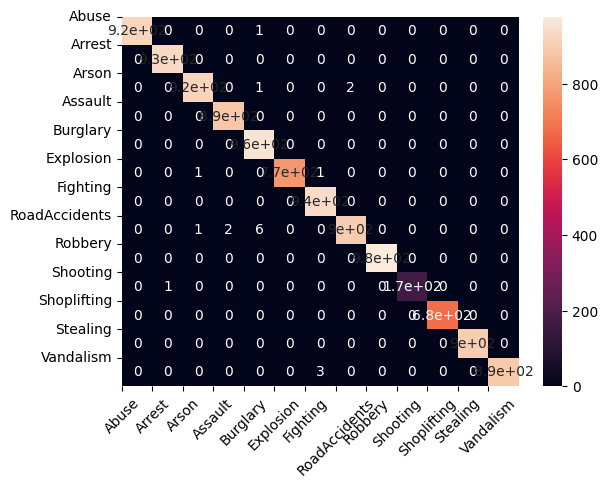

In [60]:
eval_model_f(model, X_test, y_test)